### Predict sex by height

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
X_train = np.array([
                    [158, 64], [170, 86],                  
                    [183, 84], [191, 80],
                    [155, 49], [163, 59],                    
                    [180, 67], [158, 54],                    
                    [170, 67]
                    ])
y_train = [
          "male", "male",
          "male", "male",
          "female", "female",
          "female", "female",
          "female"
          ]

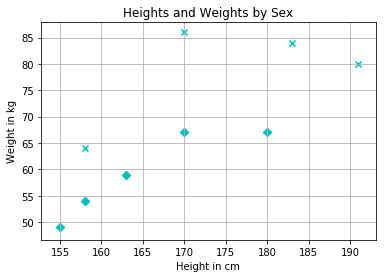

In [3]:
plt.figure()

for idx, n in enumerate(X_train):
    plt.scatter(n[0], n[1],
                c="c",                
                marker="x" if y_train[idx]=="male" else "D")                
                                
plt.title("Heights and Weights by Sex")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.grid(True)
plt.show()

### Distance between training and testing

In [4]:
test = np.array([[155, 70]])
euc_distance = np.sqrt(np.sum((X_train - test) ** 2, axis=1))
euc_distance

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

### Nearest neighbors

In [5]:
nearest_neighbors = euc_distance.argsort()
nearest_neighbors_by_sex = np.take(y_train, nearest_neighbors)
nearest_neighbors_by_sex

array(['male', 'female', 'female', 'female', 'female', 'male', 'female',
       'male', 'male'], dtype='<U6')

### 3 nearest neighbors

In [6]:
c = Counter(np.take(y_train, euc_distance.argsort()[:3]))
c.most_common(1)[0][0]

'female'

In [12]:
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_train_bin.T[0]

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [8]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train_bin.reshape(-1))
prediction_bin = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_labels = lb.inverse_transform(prediction_bin)
predicted_labels

array(['female'], dtype='<U6')

In [17]:
y_test = ["male", "male", "female", "female"]
y_test_bin = lb.transform(y_test)
y_test_bin.T[0]

array([1, 1, 0, 0])

In [21]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
X_test_bin = clf.predict(X_test)
X_test_bin

array([0, 1, 0, 0])

### The first  sample was predicted should be male.

In [22]:
lb.inverse_transform(X_test_bin)

array(['female', 'male', 'female', 'female'], dtype='<U6')

### Test accuracy

In [24]:
print("Accuracy: {}%".format(accuracy_score(y_test_bin, X_test_bin)* 100))

Accuracy: 75.0%


### Test precision - True Positives

In [27]:
print("Precision: {}".format(precision_score(y_test_bin, X_test_bin)))

Precision: 1.0


### Recall Proportion - True positives predicted

In [32]:
print("Recall: {}".format(recall_score(y_test_bin, X_test_bin)))

Recall: 0.5


### Harmonic mean of precision and recall: weighted average

In [34]:
print("F1 score: {}".format(f1_score(y_test_bin, X_test_bin)))

F1 score: 0.6666666666666666


In [39]:
print(classification_report(y_test_bin, X_test_bin,
                      target_names=["male"],
                     labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



### Conclusion:<br/>This prediction has a 75% rate accuracy.